In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from collections import Counter as c
import pickle

In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
data = pd.read_csv('concrete.csv')

In [3]:
req_col_names = ["cement", "slag", "flyAsh", "water", "superplasticizer",
                 "coarseAggregate", "fineAggregare", "age", "csMPa"]
curr_col_names = list(data.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = data.rename(columns=mapper)

In [4]:
data.head()

,cement,slag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregare,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
data.tail()

,cement,slag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregare,age,csMPa
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyAsh            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseAggregate   1030 non-null   float64
 6   fineAggregare     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
data.describe()

,cement,slag,flyAsh,water,superplasticizer,coarseAggregate,fineAggregare,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
data.isnull().any()

cement              False
slag                False
flyAsh              False
water               False
superplasticizer    False
coarseAggregate     False
fineAggregare       False
age                 False
csMPa               False
dtype: bool

In [9]:
data.isnull().sum()

cement              0
slag                0
flyAsh              0
water               0
superplasticizer    0
coarseAggregate     0
fineAggregare       0
age                 0
csMPa               0
dtype: int64

<AxesSubplot:>

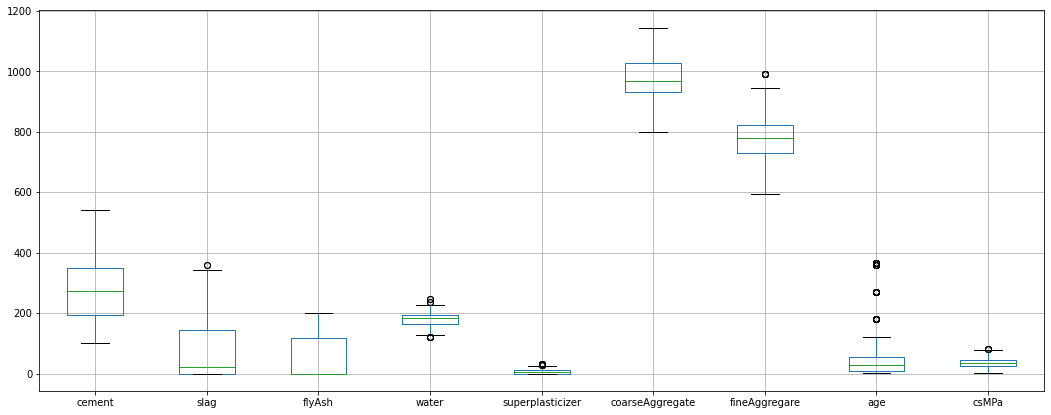

In [10]:
data.boxplot(figsize=(18,7))

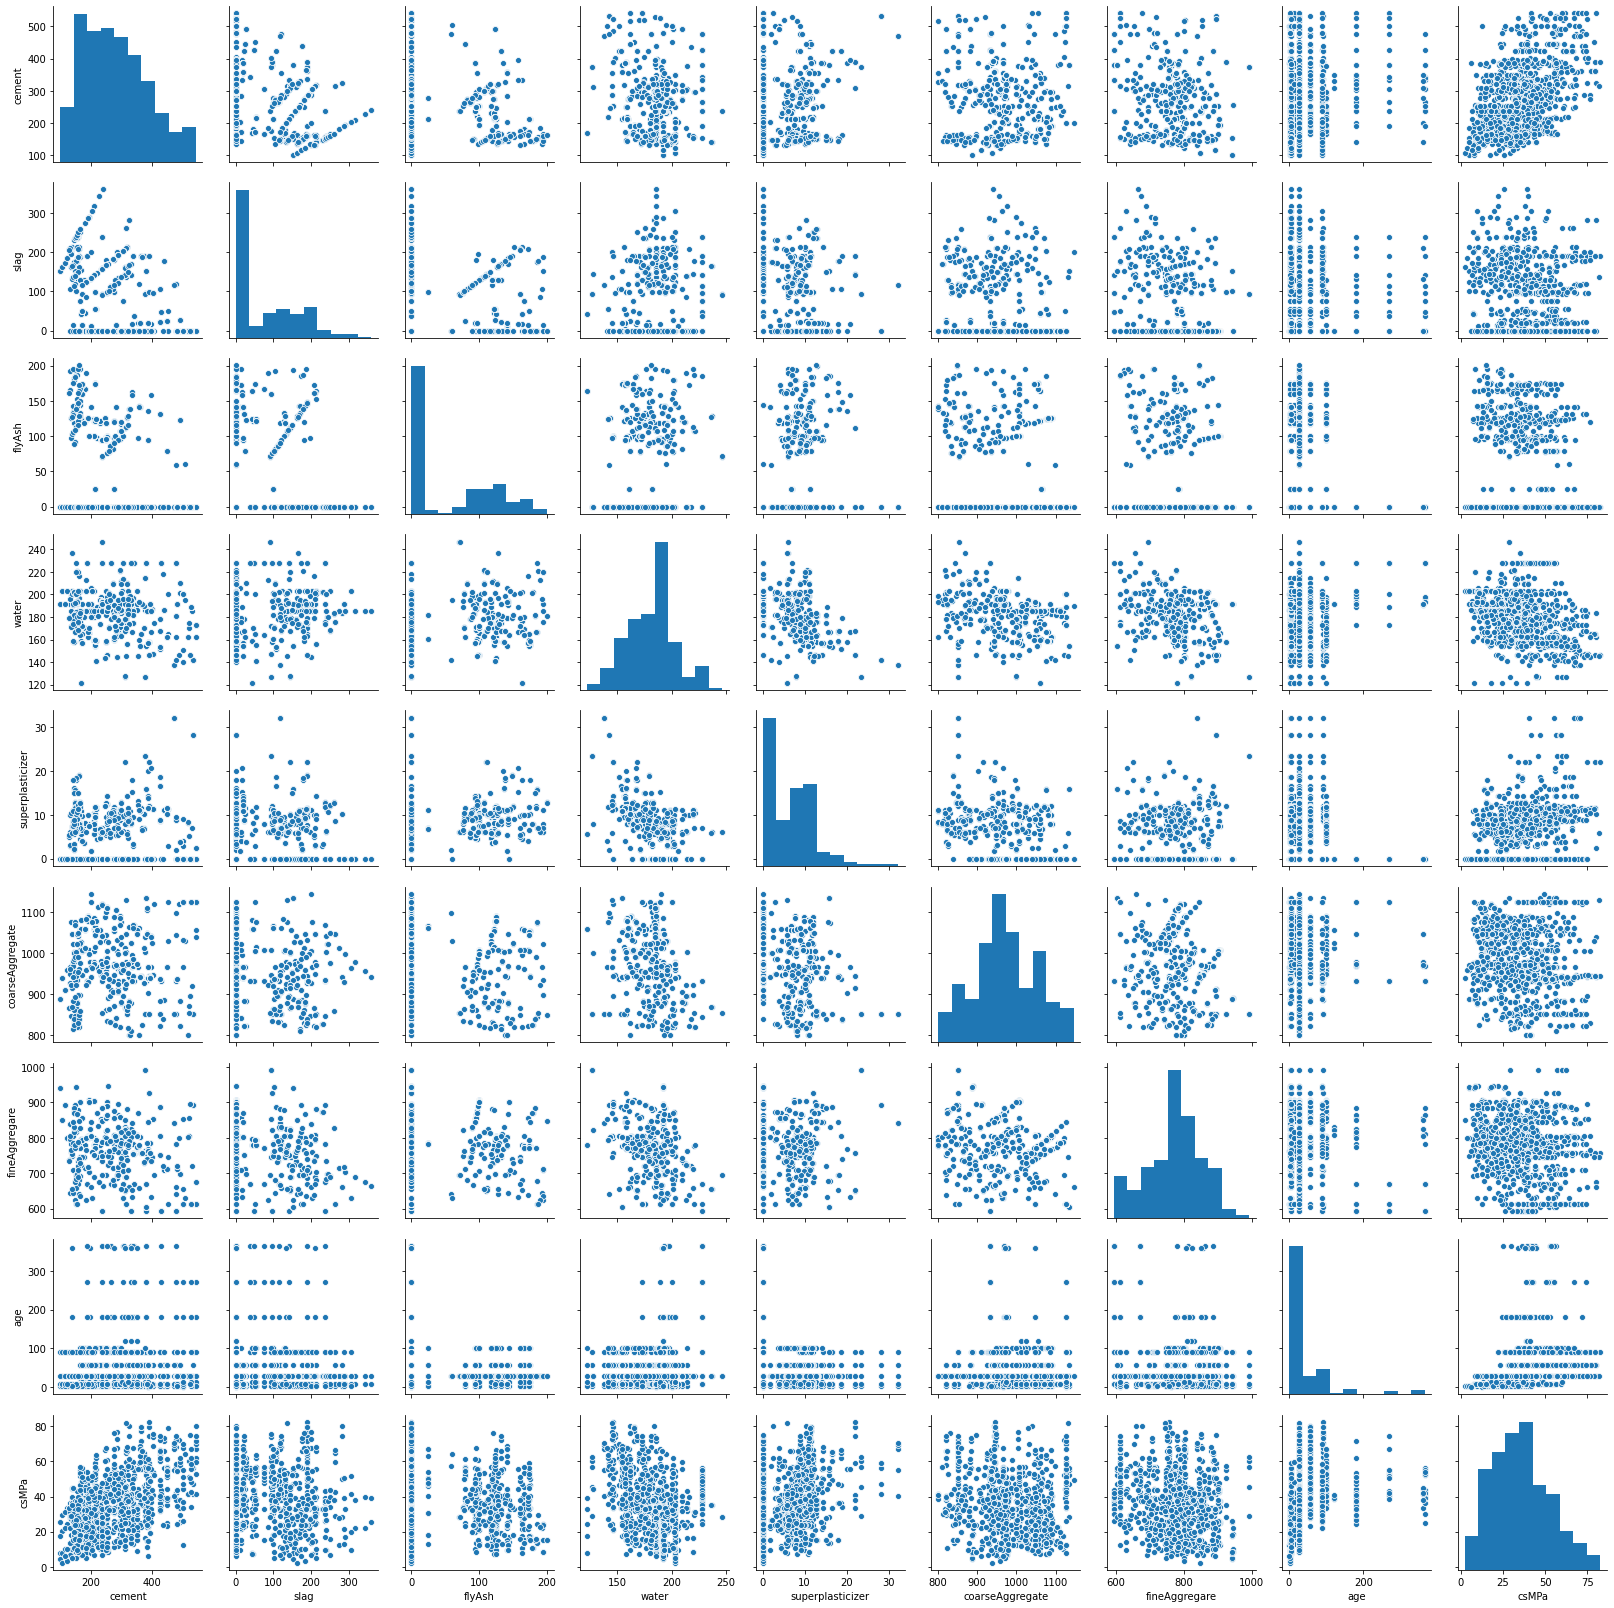

In [11]:
sns.pairplot(data)
plt.show()

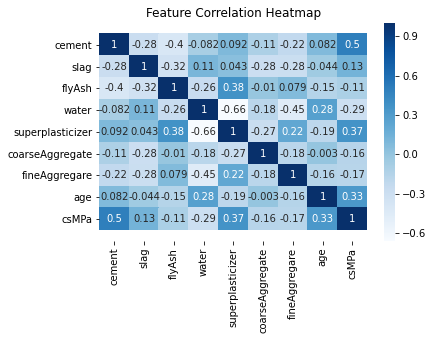

In [12]:
corr = data.corr()

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


Text(0.5, 1.0, 'Compressive Strength Distribution')

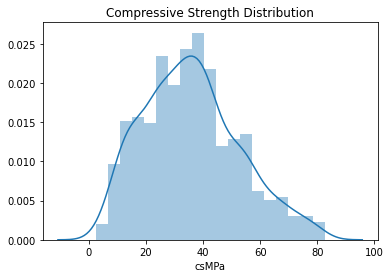

In [13]:
ax = sns.distplot(data.csMPa)
ax.set_title("Compressive Strength Distribution")

In [15]:
x = pd.DataFrame(data,columns = data.columns[:8])
y = pd.DataFrame(data,columns = data.columns[8:])

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 1)

In [19]:
from sklearn.linear_model import Lasso, Ridge

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print(y_pred_lr)

[[33.22627883]
 [21.80289532]
 [23.46470533]
 [22.04045812]
 [35.44288298]
 [48.23641472]
 [24.0704356 ]
 [39.41404028]
 [31.32018877]
 [39.26429117]
 [44.66660441]
 [19.29117134]
 [27.39738993]
 [28.4801319 ]
 [13.0562985 ]
 [26.83796027]
 [57.2093126 ]
 [43.92148624]
 [51.23353905]
 [34.54718684]
 [23.54925768]
 [38.03898739]
 [22.74607052]
 [46.22503964]
 [58.85535242]
 [33.09241484]
 [32.25535752]
 [27.9898182 ]
 [32.84768913]
 [24.55818947]
 [70.97936967]
 [51.80207684]
 [24.56219158]
 [34.95172838]
 [55.01667196]
 [33.79388359]
 [25.51929877]
 [22.86384642]
 [30.82701923]
 [29.25329387]
 [52.5036429 ]
 [24.5825076 ]
 [54.23106293]
 [35.8247001 ]
 [33.53455504]
 [34.44771718]
 [26.49990314]
 [28.44183701]
 [53.17657692]
 [38.43341367]
 [21.95499432]
 [30.05901149]
 [65.62845491]
 [61.00386785]
 [58.76501548]
 [18.95293067]
 [50.39223792]
 [25.33113831]
 [23.47026675]
 [32.62665798]
 [59.10961507]
 [71.76677474]
 [47.71135578]
 [40.81400268]
 [34.25510511]
 [42.1058989 ]
 [47.37590

In [24]:
lasso = Lasso()
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)
print(y_pred_lasso)

[33.06180999 21.73660365 23.42310162 22.097905   35.36942864 47.8317535
 24.21845006 39.42874734 31.13509102 39.53734148 45.46012804 19.43082155
 27.2197063  28.59905694 13.07052829 26.58049032 57.16951762 43.99393061
 51.09998628 34.37767608 23.49069651 37.91213091 22.79662825 46.20314417
 58.32592097 33.04567285 32.4130407  28.12643964 32.97395531 24.45652933
 70.95189936 51.54954693 24.61001297 34.83968713 54.70544754 33.97906144
 25.79317258 22.95922034 30.87356193 29.42243597 52.2824061  24.56992672
 53.68320559 35.81718105 33.45433344 34.4950333  26.68356367 28.6039341
 52.56769366 38.43489391 21.86515287 30.12290036 65.55294503 60.78226846
 58.22507303 18.87454814 50.13302258 25.25368559 23.54642404 32.43964478
 58.97993299 71.75792728 48.09712262 40.985397   34.43877644 41.7363352
 47.37006827 34.74124348 29.90945682 26.97215828 47.95974358 22.53948996
 34.10120184 17.87457137 54.44946357 53.37292471 67.95407518 33.06739074
 54.89902422 40.97042441 33.04116231 53.04619042 61.55

In [26]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
print(y_pred_ridge)

[[33.22620751]
 [21.80285193]
 [23.46465697]
 [22.04049134]
 [35.4428367 ]
 [48.23624988]
 [24.07047886]
 [39.41399183]
 [31.32004386]
 [39.26446889]
 [44.66697683]
 [19.29120432]
 [27.39725137]
 [28.48018577]
 [13.05626816]
 [26.83780623]
 [57.20929748]
 [43.92152967]
 [51.23351663]
 [34.54711532]
 [23.54925056]
 [38.03894871]
 [22.7460954 ]
 [46.22499054]
 [58.85511044]
 [33.09236694]
 [32.25547549]
 [27.98980869]
 [32.84772843]
 [24.55814818]
 [70.97935394]
 [51.80201137]
 [24.56222444]
 [34.95168679]
 [55.01654621]
 [33.79395693]
 [25.51940856]
 [22.86387559]
 [30.82701595]
 [29.25341227]
 [52.50358034]
 [24.58251685]
 [54.23076132]
 [35.82466792]
 [33.53453847]
 [34.4477291 ]
 [26.49996005]
 [28.44189607]
 [53.17627775]
 [38.43344251]
 [21.95496377]
 [30.05904317]
 [65.62848512]
 [61.00382682]
 [58.76477748]
 [18.95290055]
 [50.39214521]
 [25.33111324]
 [23.47029127]
 [32.62659463]
 [59.1095623 ]
 [71.76675936]
 [47.71152158]
 [40.8141374 ]
 [34.25517832]
 [42.10570067]
 [47.37594

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
y_pred = gbr.predict(x_test)
print(" Prediction made by Gradient Boosting model:",y_pred)

 Prediction made by Gradient Boosting model: [21.95234148 13.08162009 24.70391082 11.32025646 34.80947116 64.77465613
 18.45044902 48.72305133 40.43710467 20.12460115 38.64180627 14.73181983
 37.33435548 31.47690119  8.39548073 28.19448467 38.81451032 60.80235308
 55.41349105 36.17514766 22.09653922 50.34586419 17.54229031 59.22520866
 60.28299988 39.18419497 33.47870521 29.62105842 35.97574895 13.79206845
 42.2242261  54.78728341 27.06673021 24.87332946 34.92824549 39.36193638
 16.50942869 26.70669935 25.92994908 14.78114178 39.53782087 13.46243396
 47.04232237 38.96167764 35.78935294 27.67350801 33.28586165 27.08849056
 34.08139794 51.48267971 25.15450245 35.37386967 61.10296174 53.1944813
 56.51847802  8.85042266 38.02781274 22.95231442 32.99320901 44.64324648
 49.32434581 41.57929522 52.63226021 49.50361013 22.39792524 34.73179197
 48.47116198 35.05219693 40.66955402 27.65021804 29.83790459 27.00297825
 39.36193638 12.80090167 67.55248442 58.04726327 53.09303053 14.88848036
 60.338

In [29]:
score = gbr.score(x_test,y_test)
print("Score of Gradient Boosting Model:",score)

Score of Gradient Boosting Model: 0.8857614757494899


In [30]:
print(" MAE:",mean_absolute_error(y_test,y_pred))
print(" MSE:",mean_squared_error(y_test,y_pred))
print(" RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))

 MAE: 3.8369940934298286
 MSE: 29.781364073516993
 RMSE: 5.457230439840066


In [31]:
pickle.dump(gbr,open('cement.pkl','wb'))